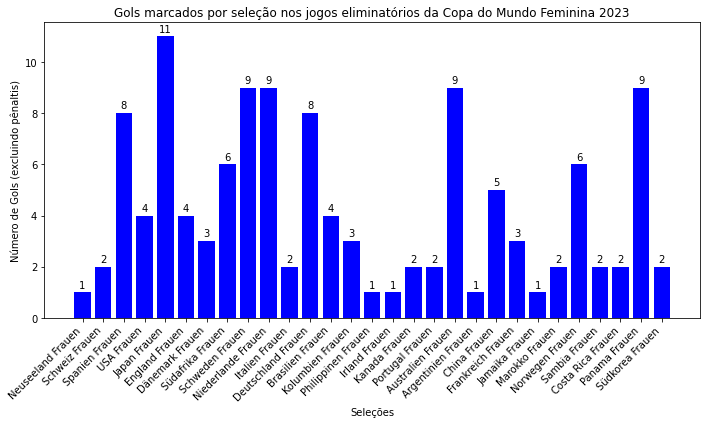

In [1]:
import requests
import matplotlib.pyplot as plt

#Pergunta:
#Dentre todas as seleções que jogaram as eliminatórias da Copa do Mundo Feminina 2023, quantos gols, descontando os que foram feitos em pênalti, cada seleção fez nos jogos eliminatórios?

#URL da API:
url = 'https://api.openligadb.de/getmatchdata/wwc/2023'

#Realizando requisição:
response = requests.get(url)

#Verificando se a request foi realizada com sucesso:
if response.status_code == 200:
    #Extraindo os dados do JSON de resposta, para validação:
    data = response.json()
else:
    print(f'Ocorreu um erro: {response.status_code}')
    

#Dicionário para armazenar os gols por seleção (excluindo pênaltis):
gols_por_selecao = {}

# Filtrando os jogos das eliminatorias:
# * Eliminatorias = Partidas de grupo 'Group Matches'
eliminatorias = [jogo for jogo in data if 'Group Matches' in jogo['group']['groupName']]

#Iterar sobre cada jogo das eliminatorias:
for jogo in eliminatorias:
    #Iniciando verificações:
    if "matchID" in jogo:
        #Obtem os gols marcados no jogo
        gols = jogo["goals"]

        #Iterar sobre os gols e contabilizar apenas os que não são em pênaltis:
        for gol in gols:
            if not gol["isPenalty"]:
                #Encontar a seleção que marcou o gol
                if gol["scoreTeam1"] > 0:
                    selecao = jogo["team1"]["teamName"]
                elif gol["scoreTeam2"] > 0:
                    selecao = jogo["team2"]["teamName"]
                else:
                    #Caso nenhum time tenha marcado gol...
                    continue

                #Adiciona ao dicionário de gols, por seleção:
                if selecao in gols_por_selecao:
                    gols_por_selecao[selecao] += 1
                else:
                    gols_por_selecao[selecao] = 1

#Prepara dados para o gráfico de barras:
selecoes = list(gols_por_selecao.keys())
gols = list(gols_por_selecao.values())

#Plotar o gráfico de barras:
plt.figure(figsize=(10, 6))
bars = plt.bar(selecoes, gols, color='blue')
plt.xlabel('Seleções')
plt.ylabel('Número de Gols (excluindo pênaltis)')
plt.title('Gols marcados por seleção nos jogos eliminatórios da Copa do Mundo Feminina 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Adiciona os valores dos gols sobre as barras:
for bar, gol in zip(bars, gols):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, gol, ha='center', va='bottom')


plt.show()